# Results visualization for hard and weak scaling

This notebook is intended to show the obtained results for the MPI implementation of the Poisson stencil. For the correct working of the code, please make sure that the results folder is filled with the necessary .txt files

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def show_results(synchronization):
    """
    Produces a couple of plots for hard scaling speedup and weak scaling efficiency for synchronous or asynchronous MPI
    :param results_file: .txt file containing the results
    """
    
    folder = f'results'
    
    results_strong = []

    with open(folder + f"/{synchronization}_strong_scaling.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            results_strong.append([int(currentline[0]), float(currentline[1])])

    # with open(folder + f"/{synchronization}_weak_scaling.txt") as f:
    #    for line in f:
    #        currentline = line.rstrip("\n").split(",")
    #        results_weak[int(currentline[3])] = [int(currentline[0]), float(currentline[4])]
            
    plt.figure()

    # fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
    if synchronization == "sync": 
        str_ = "Synchronous"
    else:
        str_ = "Asynchronous"

    psizes = [results_strong[item][0] for item in range(len(results_strong))]
    times = [results_strong[item][1] for item in range(len(results_strong))]
    ax.loglog(psizes, times[0]/np.array(times), marker="o")
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.axvline(28, ymin=0, ymax=50, linestyle='--', color="black", label="p=28")
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_xlabel("p", fontsize=30)
    ax.set_ylabel("$S_p$", fontsize=30)
    ax.set_xticks(psizes)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Hard scaling speedup", fontsize=25)
    ax.plot(sorted(psizes), sorted(psizes), marker="x", label=f"Ideal")
    ax.legend(loc='upper left', ncol=1, fontsize=15)  # unique legend for the two plots


    # psizes = []
    # times = []

    # for key in results_weak.keys():
    #    psizes.append(results_weak[key][0])
    #    times.append(results_weak[key][1])
    # ax[1].xaxis.label.set_size(30)
    # ax[1].yaxis.label.set_size(30)
    # ax[1].set_ylim([0, 1.05])
    # ax[1].axvline(28, ymin=0, ymax=1, linestyle='--', color="black", label="p=28")
    # ax[1].tick_params(axis='x', labelsize=30)
    # ax[1].tick_params(axis='y', labelsize=30)
    # ax[1].semilogx(psizes, times[0]/(np.array(times)), marker="o", label=f"Efficiency")
    # ax[1].set_title("Weak scaling efficiency", fontsize=30)
    # ax[1].set_xlabel("p", fontsize=35)
    # ax[1].set_ylabel("$E_p$", fontsize=35)
    # ax[1].legend(loc='lower left', ncol=1, fontsize=20)
    
    # plt.show()

## gcc-MPI Compilation Results

### Synchronous MPI

<Figure size 432x288 with 0 Axes>

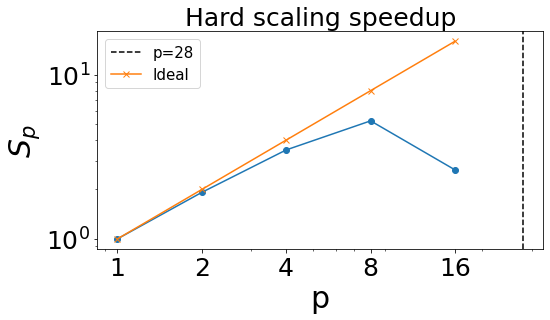

In [28]:
show_results("sync")    

### Asynchronous MPI

<Figure size 432x288 with 0 Axes>

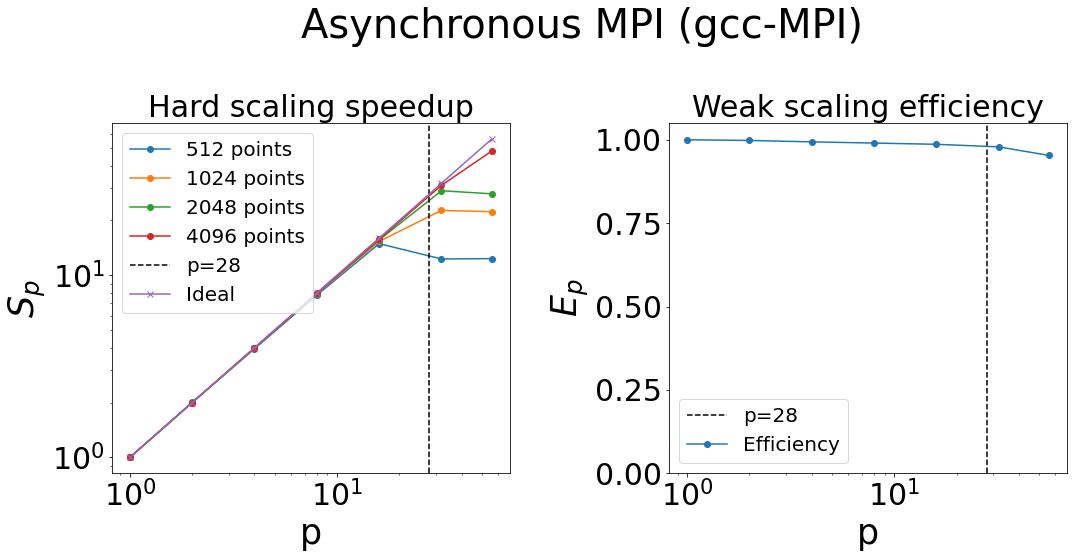

In [5]:
show_results("async")